In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preparation

## Importing a dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into a Training set a Test set

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/opt/pyenv/versions/3.6.0/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


# Modeling

## Fitting the Classifier to the Training set

In [8]:
from sklearn.svm import SVC

In [9]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)
result = pd.DataFrame([y_test, y_pred]).transpose()
result.columns = ['observed', 'predicted']
result[result['observed'] != result['predicted']]

,observed,predicted
9,0,1
15,0,1
31,1,0
53,0,1
81,0,1
85,1,0
95,1,0


## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]])

## Visualising results

In [13]:
from matplotlib.colors import ListedColormap

In [14]:
def draw(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.5, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

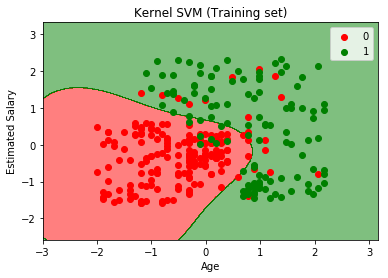

In [15]:
draw(X_train, y_train, 'Kernel SVM (Training set)')

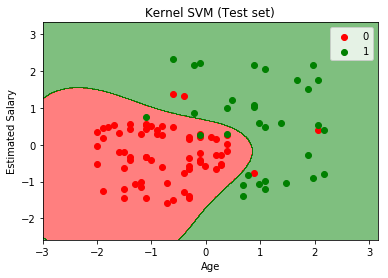

In [16]:
draw(X_test, y_test, 'Kernel SVM (Test set)')